In [1]:
# import libraries

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import iyer.txt dataset

cols = ['Gene_ID', 'Ground_Truth_Cluster_ID', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12']
df_iyer = pd.read_csv('./Datasets/iyer.txt', sep="	", names=cols, header=None)

# remove outliers
df_iyer = df_iyer[df_iyer.Ground_Truth_Cluster_ID != -1]

c:\Users\z1297\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\z1297\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\z1297\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\z1297\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Text(0, 0.5, 'SSE')

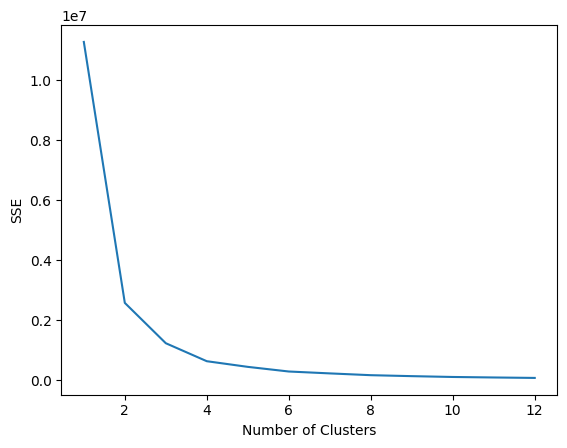

In [6]:
# estimate the number of clusters using a SSE vs. number of clusters graph

numClusters = [1,2,3,4,5,6,7,8,9,10,11,12]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(df_iyer)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [7]:
# normalize dataset

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_iyer)

# PCA with n = 3
pca = PCA(n_components=3).fit(scaled_data)
print('Explained Variance Ratio: ', pca.explained_variance_ratio_)
print('Sum of variance by these 3 components: ', pca.explained_variance_ratio_.cumsum()[2])
print('\nSingular Values: ', pca.singular_values_)

df_iyer_3D = pca.transform(scaled_data)

Explained Variance Ratio:  [0.4703368  0.19582588 0.11800056]
Sum of variance by these 3 components:  0.7841632385067087

Singular Values:  [54.39999192 35.10180147 27.2481102 ]


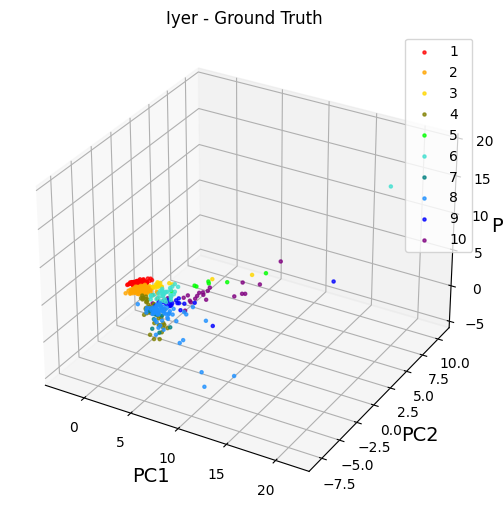

In [33]:
# use PCA to show ground truth label

# set 3 axis
Xax = df_iyer_3D[:,0]
Yax = df_iyer_3D[:,1]
Zax = df_iyer_3D[:,2]

# create figure variables
fig = plt.figure(figsize=(7,5), constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')
cdict = {0:'red', 1:'orange', 2:'gold', 3:'olive', 4:'lime', 5:'turquoise', 6:'teal', 7:'dodgerblue', 8:'blue', 9:'purple', 10:'deeppink'}
y = df_iyer.Ground_Truth_Cluster_ID

# draw figure
fig.patch.set_facecolor('white')
for l in np.unique(y):
 i = np.where(y==l)
 ax.scatter(Xax[i], Yax[i], Zax[i], c=cdict[l-1], s=5, alpha=0.75, label=l)

ax.set_xlabel("PC1", fontsize=14)
ax.set_ylabel("PC2", fontsize=14)
ax.set_zlabel("PC3", fontsize=14)

plt.title('Iyer - Ground Truth')
plt.legend()
plt.show()

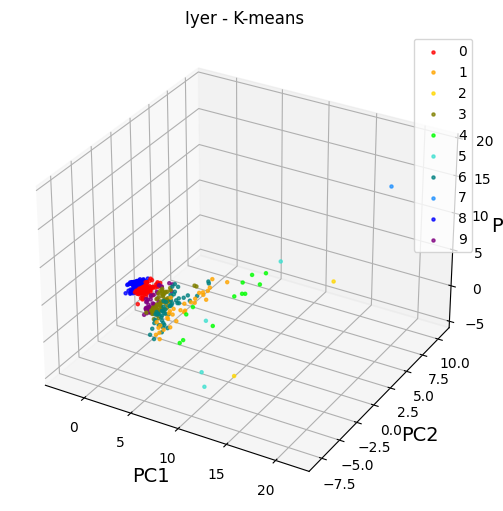

In [36]:
# implement k-means clustering

kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=3, random_state=0)
kmeans.fit(df_iyer_3D[:, 0:1:2])   # See what happened for Kmeans results and confusion matrix below with the parameter as input

# create figure variables
fig = plt.figure(figsize=(7,5), constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')
cdict = {0:'red', 1:'orange', 2:'gold', 3:'olive', 4:'lime', 5:'turquoise', 6:'teal', 7:'dodgerblue', 8:'blue', 9:'purple', 10:'deeppink'}
y = kmeans.labels_

# draw figure
fig.patch.set_facecolor('white')
for l in np.unique(y):
 i = np.where(y==l)
 ax.scatter(Xax[i], Yax[i], Zax[i], c=cdict[l], s=5, alpha=0.75, label=l)

ax.set_xlabel("PC1", fontsize=14)
ax.set_ylabel("PC2", fontsize=14)
ax.set_zlabel("PC3", fontsize=14)

plt.title('Iyer - K-means')
plt.legend()
plt.show()